
# Notebook of MI EEG experiment data analysis

## Experiment description

本次运动想象技能赛包含左手运动想象、右手运动想象和双脚运动想象任务3类任务。每组实验包含10个左手运动想象、10个右手运动想象、10个双脚运动想象，随机出现。每次任务的前2s为视频范式引导，被试准备开始运动想象，2s时开始想象并持续至第6s，随后2s为休息和结果反馈，结束后进入下一次任务。参赛选手需在视频引导后的4s内集中注意力进行相应任务的想象。识别结果会在最后2s在屏幕上进行反馈。

其中1,2,3分别为左手、右手、双脚想象任务，对应的第一列数据为开始的时间标记点。
242代表session开始，240代表trial开始，241代表trial结束。

## Analysis & results

In [22]:
import os
import mne
import numpy as np
from pathlib import Path
from omegaconf import OmegaConf
from rich import print, inspect

from data.search_data import RawDataFiles
from data.load_raw_data import LoadRawData

### Parameters

In [23]:
n_jobs = 16
verbose = True

target_experiment_name = 'MI'

event_id_of_interest = ['1', '2', '3']

ch_name_of_interest = ['C3', 'C4', 'CZ']

epochs_kwargs = dict(
    tmin=0.0, # Seconds, negative value refers starting before the epoch onset
    tmax=5.0, # Seconds, positive value refers stopping after the epoch onset
    baseline=(0.0, None), # Perform baseline recenter (tmin, None)
    event_repeated='merge', # It will rename the overlapped epochs
)

filter_kwargs = dict(
    l_freq = 1.0, # Hz
    h_freq = 40.0, # Hz
    n_jobs=n_jobs, # Multiple processing support
    verbose=verbose
)

decim_kwargs = dict(
    decim = 10, # Re-sampling points, adjust for sfreq of EEG data
    verbose=verbose
)

print(f'Using experiment name: "{target_experiment_name}"\n event_id: {event_id_of_interest}\n ch_name_of_interest: {ch_name_of_interest}\n epochs_kwargs: {epochs_kwargs}\n filter_kwargs:{filter_kwargs}\n decim_kwargs: {decim_kwargs}')

Using experiment name: "MI"
 event_id: ['1', '2', '3']
 ch_name_of_interest: ['C3', 'C4', 'CZ']
 epochs_kwargs: {'tmin': 0.0, 'tmax': 5.0, 'baseline': (0.0, None), 'event_repeated': 'merge'}
 filter_kwargs:{'l_freq': 1.0, 'h_freq': 40.0, 'n_jobs': 16, 'verbose': True}
 decim_kwargs: {'decim': 10, 'verbose': True}

### Search file & load data

In [24]:
backend_root = Path(os.path.abspath('.'))
conf = OmegaConf.load(backend_root.joinpath("conf/default.yaml"))
print(f'Using configure: {conf}')

Using configure: {'data_folder': 'd:/脑机接口专项', 'generated_date': '2024-02-21 11:32:24.652030', 'author': 
'default'}

In [25]:

rdf = RawDataFiles(conf.data_folder)
files = [e for e in rdf.find_all() if e['experiment'] == target_experiment_name]
print(f'Found files: {files}')

selected_file_info = files[0]
print(f'Selected file: {selected_file_info}')

2024-02-23 11:14:34.609 | DEBUG    | data.search_data:find_all:97 - Found 21 folders with files.
2024-02-23 11:14:34.615 | DEBUG    | data.search_data:find_all:105 - Found 11 eeg files.


Found files: [{'experiment': 'MI', 'subject': 'S1', 'file_name': 'data.bdf', 'path': 
WindowsPath('d:/脑机接口专项/MI/S1/liuyanbing-S1-20230523-Session1-6block-QLU/data.bdf'), 'unique': 
'MI-S1-liuyanbing-S1-20230523-Session1-6block-QLU-ea71f8cb1deac86b9506889697a72414'}, {'experiment': 'MI', 
'subject': 'S1', 'file_name': 'data.bdf', 'path': 
WindowsPath('d:/脑机接口专项/MI/S1/liuyanbing-S1-20230529-Session2-6block-QLU/data.bdf'), 'unique': 
'MI-S1-liuyanbing-S1-20230529-Session2-6block-QLU-c73f674d478b729968055742b809f36e'}, {'experiment': 'MI', 
'subject': 'S1', 'file_name': 'data.bdf', 'path': 
WindowsPath('d:/脑机接口专项/MI/S1/liuyanbing-S1-20230530-Session3-6block-QLU/data.bdf'), 'unique': 
'MI-S1-liuyanbing-S1-20230530-Session3-6block-QLU-1a034e268ece3d33126b759c50aef3a0'}, {'experiment': 'MI', 
'subject': 'S2', 'file_name': 'data.bdf', 'path': 
WindowsPath('d:/脑机接口专项/MI/S2/louyitai-S2-20230525-Session1-6block-QLU/data.bdf'), 'unique': 
'MI-S2-louyitai-S2-20230525-Session1-6block-QLU-f99f04c69e44f8c6e51a22d3f7bf01b4'}, {'experiment': 'MI', 'subject':
'S2', 'file_name': 'data.bdf', 'path': 
WindowsPath('d:/脑机接口专项/MI/S2/louyitai-S2-20230601-Session2-6block-QLU/data.bdf'), 'unique': 
'MI-S2-louyitai-S2-20230601-Session2-6block-QLU-b2ea8f83196d1fab6d9d6fbd90fa6b58'}, {'experiment': 'MI', 'subject':
'S2', 'file_name': 'data.bdf', 'path': 
WindowsPath('d:/脑机接口专项/MI/S2/louyitai-S2-20230602-Session3-6block-QLU/data.bdf'), 'unique': 
'MI-S2-louyitai-S2-20230602-Session3-6block-QLU-96c70760f65e776fd3a99a767f4ebdef'}]

Selected file: {'experiment': 'MI', 'subject': 'S1', 'file_name': 'data.bdf', 'path': 
WindowsPath('d:/脑机接口专项/MI/S1/liuyanbing-S1-20230523-Session1-6block-QLU/data.bdf'), 'unique': 
'MI-S1-liuyanbing-S1-20230523-Session1-6block-QLU-ea71f8cb1deac86b9506889697a72414'}

2024-02-23 11:14:34.631 | DEBUG    | data.cache_data:init_cache:64 - Using cache: {'experiment': 'MI', 'subject': 'S1', 'file_name': 'data.bdf', 'path': WindowsPath('d:/脑机接口专项/MI/S1/liuyanbing-S1-20230523-Session1-6block-QLU/data.bdf'), 'unique': 'MI-S1-liuyanbing-S1-20230523-Session1-6block-QLU-ea71f8cb1deac86b9506889697a72414', 'cache_path': WindowsPath('cache/MI-S1-liuyanbing-S1-20230523-Session1-6block-QLU-ea71f8cb1deac86b9506889697a72414')}


Extracting EDF parameters from d:\脑机接口专项\MI\S1\liuyanbing-S1-20230523-Session1-6block-QLU\data.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...


2024-02-23 11:14:34.663 | DEBUG    | data.load_raw_data:load_raw:63 - Cloned annotations <Annotations | 561 segments: 1 (60), 2 (60), 240 (180), 241 (180), 242 ...> from evt.bdf to the raw of data.bdf
2024-02-23 11:14:34.675 | DEBUG    | data.load_raw_data:load_raw:66 - Loaded raw: <RawEDF | data.bdf, 64 x 2086000 (2086.0 s), ~53 kB, data not loaded>
c:\Users\zcc\Documents\脑机接口专项\eeg-for-everyone-v1\backend\data\load_raw_data.py:124: RuntimeWarning: DigMontage is only a subset of info. There are 5 channel positions not present in the DigMontage. The channels missing from the montage are:

['ECG', 'HEOR', 'HEOL', 'VEOU', 'VEOL'].

Consider using inst.rename_channels to match the montage nomenclature, or inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  self.raw.set_montage(montage, on_missing="warn")
2024-02-23 11:14:34.702 | DEBUG    | data.load_raw_data:standard_montage:126 - App

Used Annotations descriptions: ['1', '2', '240', '241', '242', '243', '250', '3', '7', '8', '9']


2024-02-23 11:14:34.714 | DEBUG    | data.load_raw_data:get_events:86 - Got events (shape):(561, 3), event_id: {'1': 1, '2': 2, '240': 3, '241': 4, '242': 5, '243': 6, '250': 7, '3': 8, '7': 9, '8': 10, '9': 11}
c:\Users\zcc\Documents\脑机接口专项\eeg-for-everyone-v1\backend\data\load_raw_data.py:87: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.
  fig = mne.viz.plot_events(
2024-02-23 11:14:34.849 | DEBUG    | data.load_raw_data:filter_ch_names:43 - Filtered ch_names inside: ['FPZ', 'FP1', 'FP2', 'AF3', 'AF4', 'AF7', 'AF8', 'FZ', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'FCZ', 'FC1', 'FC2', 'FC3', 'FC4', 'FC5', 'FC6', 'FT7', 'FT8', 'CZ', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'T7', 'T8', 'CP1', 'CP2', 'CP3', 'CP4', 'CP5', 'CP6', 'TP7', 'TP8', 'PZ', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'POZ', 'PO3', 'PO4', 'PO5', 'PO6', 'PO7', 'PO8', 'OZ', 'O1', 'O2'] outside: ['ECG', 'HEOR', 'HEOL', 'VEOU', 'VEOL']


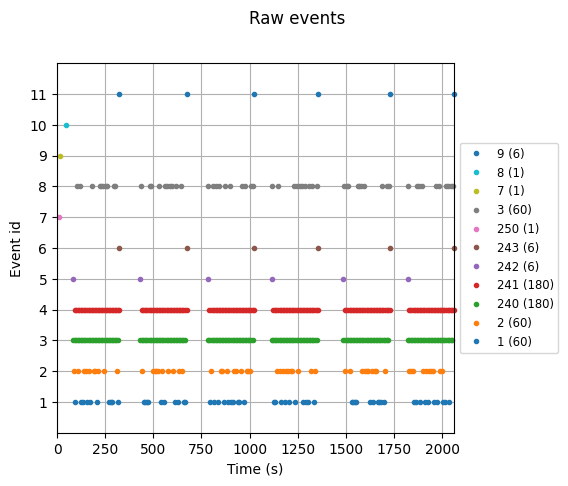

In [26]:
lrd = LoadRawData(selected_file_info)
lrd

### Collect epochs

Filtered events (num): 180, event_id: {'1': 1, '2': 2, '3': 8}

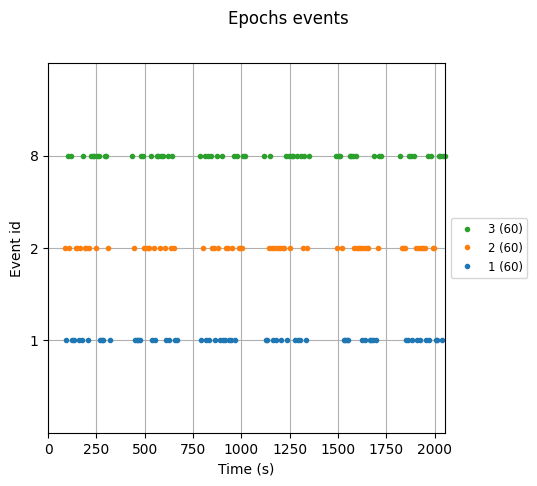

In [27]:
event_id = {k: v for k, v in lrd.event_id.items() if k in event_id_of_interest }
_events = [v for _, v in event_id.items()]
events = [e for e in lrd.events if e[2] in _events]


fig = mne.viz.plot_events(
    events,
    sfreq=lrd.raw.info["sfreq"],
    event_id=event_id,
    show=False,
)
fig.suptitle("Epochs events")
fig.savefig(lrd.to_cache("epochs-events.jpg"))

print(f'Filtered events (num): {len(events)}, event_id: {event_id}')

In [28]:
epochs = mne.Epochs(lrd.raw, events=events, event_id=event_id, picks=lrd.ch_names_inside_montage, **epochs_kwargs)
epochs

Not setting metadata
180 matching events found
Setting baseline interval to [0.0, 5.0] s
Applying baseline correction (mode: mean)
0 projection items activated


Number of events,180
Events,1: 602: 603: 60
Time range,0.000 – 5.000 s
Baseline,0.000 – 5.000 s


In [29]:
epochs.load_data()
epochs.filter(**filter_kwargs)
epochs

Loading data for 180 events and 5001 original time points ...
0 bad epochs dropped
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 3301 samples (3.301 s)



[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 tasks      | elapsed:    2.2s
[Parallel(n_jobs=16)]: Done  64 tasks      | elapsed:    2.3s
[Parallel(n_jobs=16)]: Done 2320 tasks      | elapsed:    3.0s
[Parallel(n_jobs=16)]: Done 10384 tasks      | elapsed:    4.6s
[Parallel(n_jobs=16)]: Done 10620 out of 10620 | elapsed:    4.7s finished


Number of events,180
Events,1: 602: 603: 60
Time range,0.000 – 5.000 s
Baseline,0.000 – 5.000 s


In [30]:
epochs.decimate(**decim_kwargs)
epochs

C:\Users\zcc\AppData\Local\Temp\ipykernel_75392\2751869570.py:1: RuntimeWarning: The measurement information indicates a low-pass frequency of 40.0 Hz. The decim=10 parameter will result in a sampling frequency of 100.0 Hz, which can cause aliasing artifacts.
  epochs.decimate(**decim_kwargs)


Number of events,180
Events,1: 602: 603: 60
Time range,0.000 – 5.000 s
Baseline,0.000 – 5.000 s


### Analysis

#### Evoked waveform

Averaged evoked: [<Evoked | '1' (average, N=60), 0 – 5 s, baseline 0 – 5 s, 59 ch, ~302 kB>, <Evoked | '2' 
(average, N=60), 0 – 5 s, baseline 0 – 5 s, 59 ch, ~302 kB>, <Evoked | '3' (average, N=60), 0 – 5 s, baseline 0 – 5
s, 59 ch, ~302 kB>]

No projector specified for this dataset. Please consider the method self.add_proj.


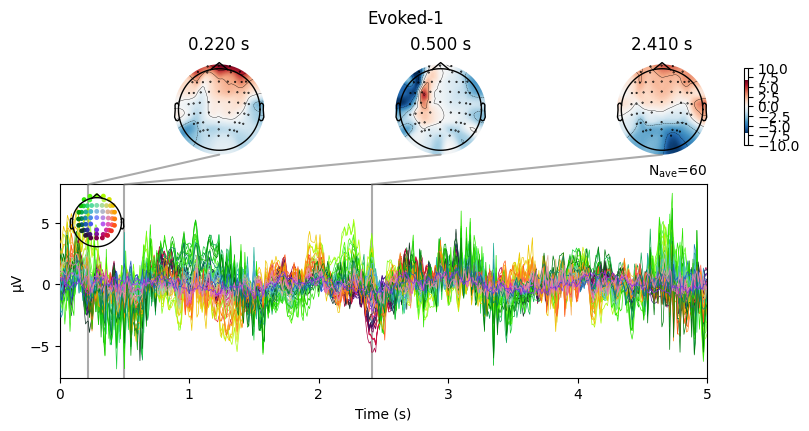

No projector specified for this dataset. Please consider the method self.add_proj.


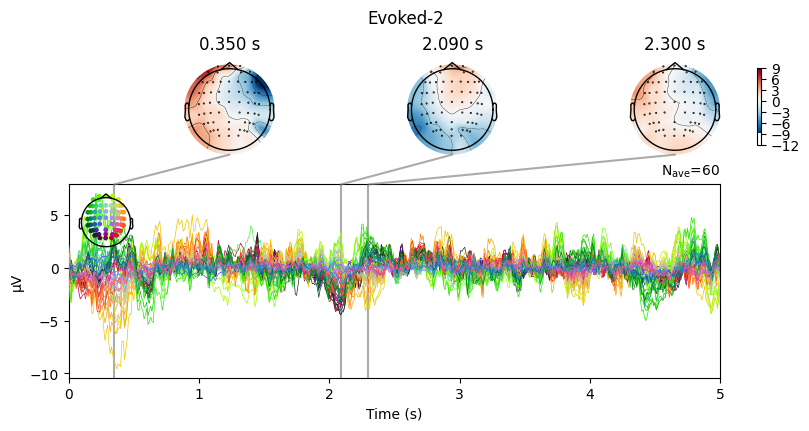

No projector specified for this dataset. Please consider the method self.add_proj.


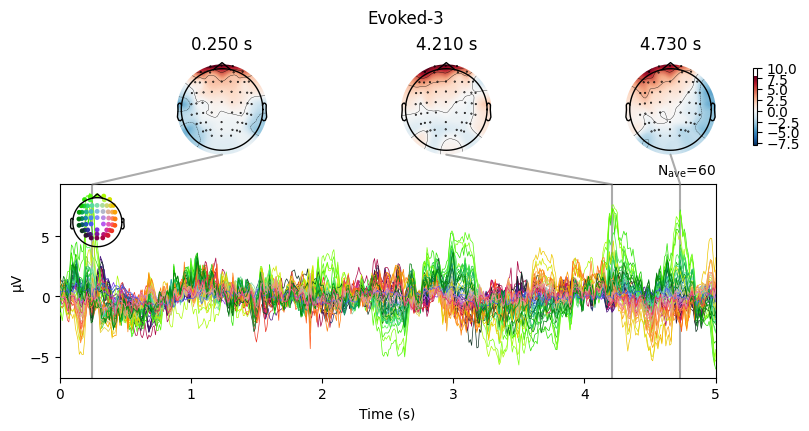

In [31]:
evoked = epochs.average(by_event_type=True)
print(f'Averaged evoked: {evoked}')

evo = evoked[0]
for evo in evoked:
    title = f'Evoked-{evo.comment}'
    fig = evo.plot_joint(title=title)
    fig.savefig(lrd.to_cache(f'{title}.jpg'))

#### TFR-morlet analysis

In [32]:
def compute_tfr_morlet(
    epochs, n_cycles: float = 4.0, segments: int = 16, h_freq: float = None
):
    # Compute the min frequency the epochs support
    # Ref: https://mne.tools/stable/generated/mne.time_frequency.tfr_morlet.html#mne.time_frequency.tfr_morlet
    freq_min = np.ceil(
        (5 / np.pi) / (len(epochs.times) + 1) * n_cycles * epochs.info["sfreq"]
    )

    if h_freq is not None:
        freq_max = h_freq
    else:
        freq_max = np.max([freq_min * 2, epochs.info["lowpass"]])

    assert (
        freq_max > freq_min
    ), f"freq max must be greater than min: {freq_max} > {freq_min}"

    freqs = np.linspace(freq_min, freq_max, segments)

    tfr_epochs = mne.time_frequency.tfr_morlet(
        epochs,
        freqs,
        picks=epochs.info.ch_names,
        n_cycles=n_cycles,
        average=False,
        return_itc=False,
        n_jobs=n_jobs,
    )
    times = epochs.times
    tfr_epochs.apply_baseline(baseline=(times[0], 0))
    array = tfr_epochs.data.squeeze()
    averaged_array = tfr_epochs.average().data.squeeze()

    return tfr_epochs, freqs, times, array, averaged_array

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.


Not setting metadata
Applying baseline correction (mode: mean)
No baseline correction applied


[Parallel(n_jobs=16)]: Done   1 out of   1 | elapsed:    0.1s finished


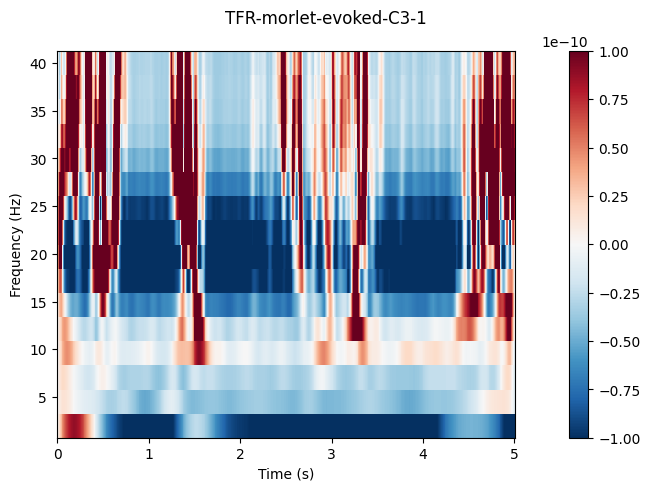

Not setting metadata


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   1 out of   1 | elapsed:    0.1s finished


Applying baseline correction (mode: mean)
No baseline correction applied


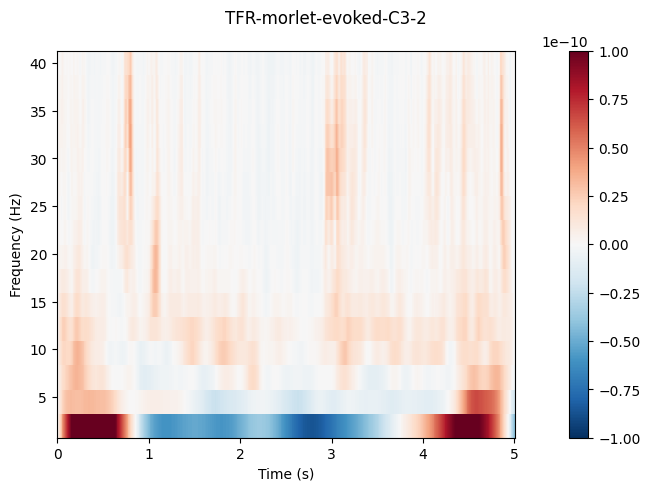

Not setting metadata


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   1 out of   1 | elapsed:    0.1s finished


Applying baseline correction (mode: mean)
No baseline correction applied


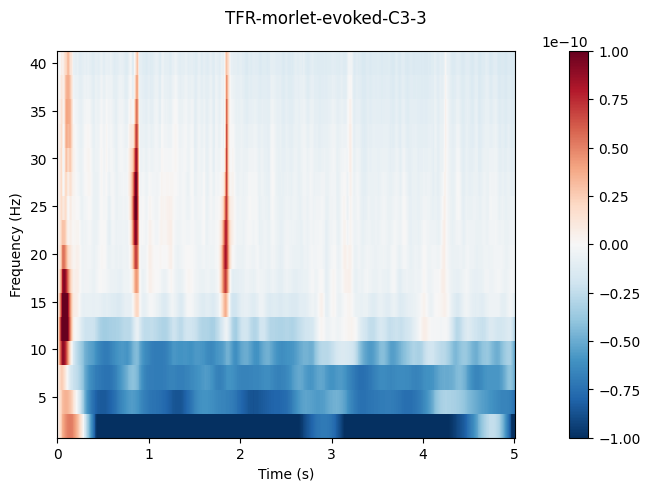

Not setting metadata


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   1 out of   1 | elapsed:    0.1s finished


Applying baseline correction (mode: mean)
No baseline correction applied


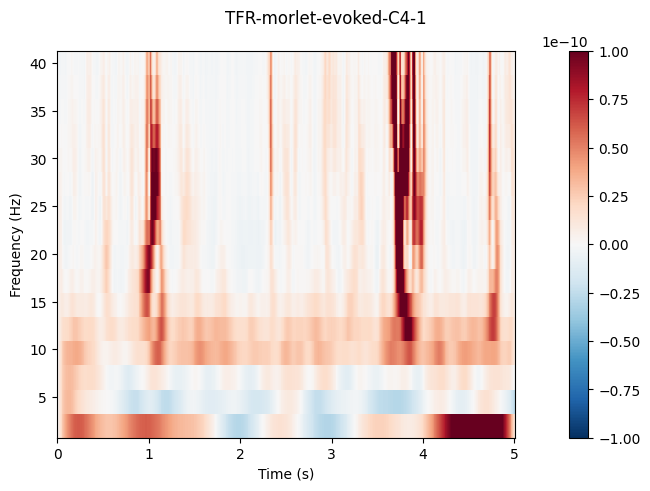

Not setting metadata


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   1 out of   1 | elapsed:    0.1s finished


Applying baseline correction (mode: mean)
No baseline correction applied


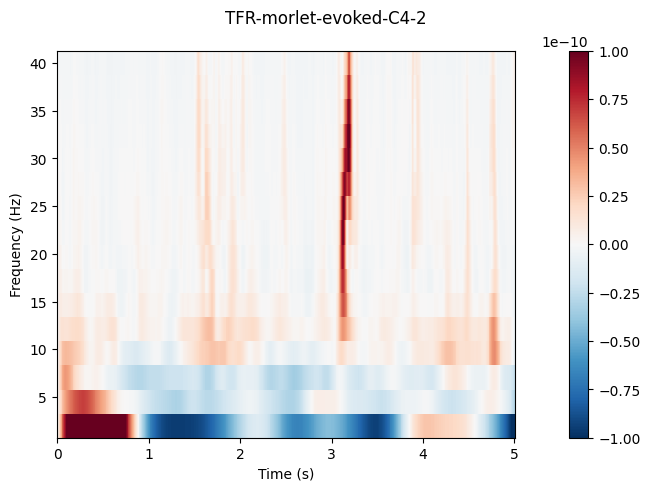

Not setting metadata
Applying baseline correction (mode: mean)
No baseline correction applied


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   1 out of   1 | elapsed:    0.1s finished


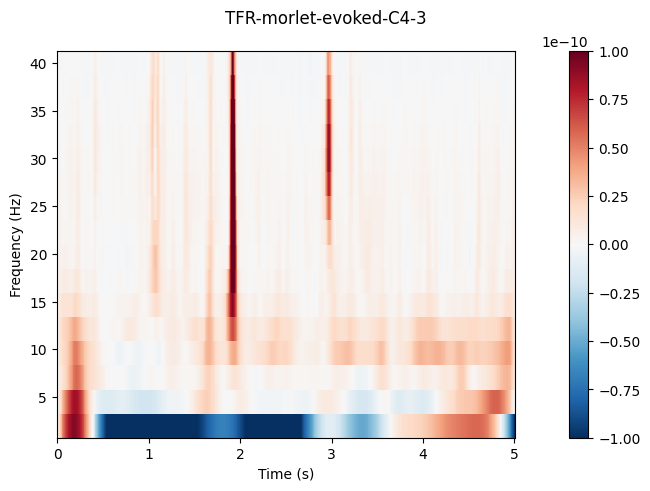

Not setting metadata
Applying baseline correction (mode: mean)
No baseline correction applied


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   1 out of   1 | elapsed:    0.1s finished


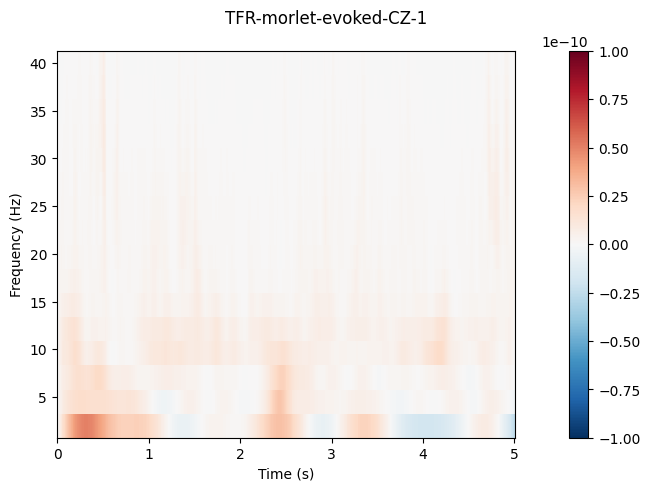

Not setting metadata


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   1 out of   1 | elapsed:    0.1s finished


Applying baseline correction (mode: mean)
No baseline correction applied


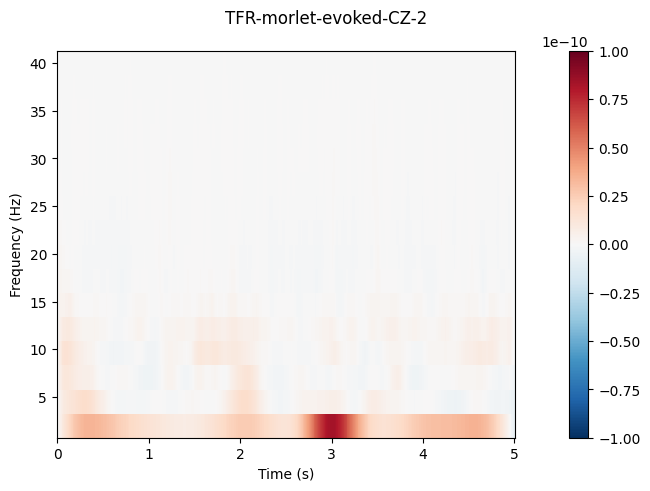

Not setting metadata


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   1 out of   1 | elapsed:    0.1s finished


Applying baseline correction (mode: mean)
No baseline correction applied


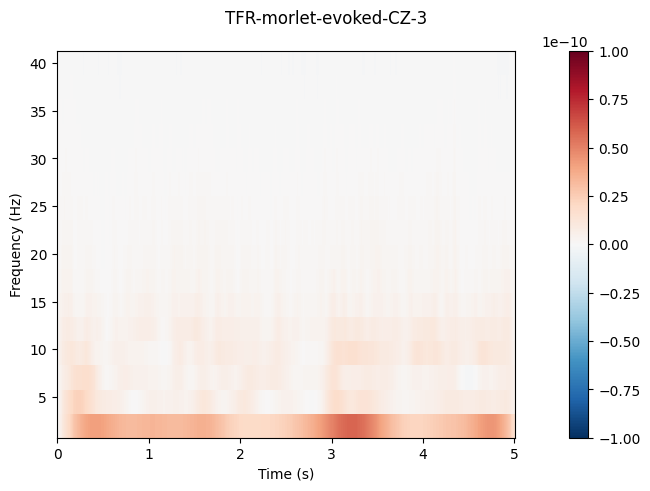

Computed tfr_epochs: <EpochsTFR | time : [0.000000, 5.000000], freq : [2.000000, 40.000000], epochs : 60, channels 
: 1, ~3.7 MB>
 freqs: [ 2.          4.53333333  7.06666667  9.6        12.13333333 14.66666667
 17.2        19.73333333 22.26666667 24.8        27.33333333 29.86666667
 32.4        34.93333333 37.46666667 40.        ]
 times: [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.   1.01 1.02 1.03 1.04 1.05 1.06 1.07 1.08 1.09 1.1  1.11
 1.12 1.13 1.14 1.15 1.16 1.17 1.18 1.19 1.2  1.21 1.22 1.23 1.24 1.25
 1.26 1.27 1.28 1.29 1.3  1.31 1.32 1.33 1.34 1.35 1.36 1.37 1.38 1.39
 1.4  1.41 1.42 1.43 1.44 1.45 1.46 1.47 1.48 1.49 1.5  1.51 1.52 1.53
 1.54 1.55 1.56 1.57 1.58 1.59 1.6  1.61 1.62 1.63 1.64 1.65 1.66 1.67
 1.68 1.69 1.7  1.71 1.72 1.73 1.74 1.75 1.76 1.77 1.78 1.79 1.8  1.81
 1.82 1.83 1.84 1.85 1.86 1.87 1.88 1.89 1.9  1.91 1.92 1.93 1.94 1.95
 1.96 1.97 1.98 1.99 2.   2.01 2.02 2.03 2.04 2.05 2.06 2.07 2.08 2.09
 2.1  2.11 2.12 2.13 2.14 2.15 2.16 2.17 2.18 2.19 2.2  2.21 2.22 2.23
 2.24 2.25 2.26 2.27 2.28 2.29 2.3  2.31 2.32 2.33 2.34 2.35 2.36 2.37
 2.38 2.39 2.4  2.41 2.42 2.43 2.44 2.45 2.46 2.47 2.48 2.49 2.5  2.51
 2.52 2.53 2.54 2.55 2.56 2.57 2.58 2.59 2.6  2.61 2.62 2.63 2.64 2.65
 2.66 2.67 2.68 2.69 2.7  2.71 2.72 2.73 2.74 2.75 2.76 2.77 2.78 2.79
 2.8  2.81 2.82 2.83 2.84 2.85 2.86 2.87 2.88 2.89 2.9  2.91 2.92 2.93
 2.94 2.95 2.96 2.97 2.98 2.99 3.   3.01 3.02 3.03 3.04 3.05 3.06 3.07
 3.08 3.09 3.1  3.11 3.12 3.13 3.14 3.15 3.16 3.17 3.18 3.19 3.2  3.21
 3.22 3.23 3.24 3.25 3.26 3.27 3.28 3.29 3.3  3.31 3.32 3.33 3.34 3.35
 3.36 3.37 3.38 3.39 3.4  3.41 3.42 3.43 3.44 3.45 3.46 3.47 3.48 3.49
 3.5  3.51 3.52 3.53 3.54 3.55 3.56 3.57 3.58 3.59 3.6  3.61 3.62 3.63
 3.64 3.65 3.66 3.67 3.68 3.69 3.7  3.71 3.72 3.73 3.74 3.75 3.76 3.77
 3.78 3.79 3.8  3.81 3.82 3.83 3.84 3.85 3.86 3.87 3.88 3.89 3.9  3.91
 3.92 3.93 3.94 3.95 3.96 3.97 3.98 3.99 4.   4.01 4.02 4.03 4.04 4.05
 4.06 4.07 4.08 4.09 4.1  4.11 4.12 4.13 4.14 4.15 4.16 4.17 4.18 4.19
 4.2  4.21 4.22 4.23 4.24 4.25 4.26 4.27 4.28 4.29 4.3  4.31 4.32 4.33
 4.34 4.35 4.36 4.37 4.38 4.39 4.4  4.41 4.42 4.43 4.44 4.45 4.46 4.47
 4.48 4.49 4.5  4.51 4.52 4.53 4.54 4.55 4.56 4.57 4.58 4.59 4.6  4.61
 4.62 4.63 4.64 4.65 4.66 4.67 4.68 4.69 4.7  4.71 4.72 4.73 4.74 4.75
 4.76 4.77 4.78 4.79 4.8  4.81 4.82 4.83 4.84 4.85 4.86 4.87 4.88 4.89
 4.9  4.91 4.92 4.93 4.94 4.95 4.96 4.97 4.98 4.99 5.  ]
 array shape: (60, 16, 501)
 averaged_array shape: (16, 501)

In [33]:
v_scale = 1e-10
for sensor_name in ch_name_of_interest:
    for event_label in event_id_of_interest:
        tfr_epochs, freqs, times, array, averaged_array= compute_tfr_morlet(epochs.copy().pick([sensor_name])[event_label])
        evoked = tfr_epochs.average()
        title = f'TFR-morlet-evoked-{sensor_name}-{event_label}'
        fig = evoked.plot(vmin=-v_scale, vmax=v_scale, title=title, show=True)[0]
        fig.savefig(lrd.to_cache(f'{title}.jpg'))

print(f'Computed tfr_epochs: {tfr_epochs}\n freqs: {freqs}\n times: {times}\n array shape: {array.shape}\n averaged_array shape: {averaged_array.shape}')


In [34]:
array.shape

(60, 16, 501)

In [43]:
import plotly.express as px
import pandas as pd

from tqdm.auto import tqdm

data = []

for i in tqdm(range(array.shape[0]), 'Loading data'):
    for j, freq in enumerate(freqs):
        data.extend(
            dict(sample=i, freq=freq, time=time, value=array[i, j, k])
            for k, time in enumerate(times)
        )
df = pd.DataFrame(data)
df['size'] = 1
df

Loading data: 100%|██████████| 60/60 [00:00<00:00, 345.56it/s]


,sample,freq,time,value,size
0,0,2.0,0.00,0.000000e+00,1
1,0,2.0,0.01,2.380627e-12,1
2,0,2.0,0.02,4.871617e-12,1
3,0,2.0,0.03,7.469018e-12,1
4,0,2.0,0.04,1.016771e-11,1
...,...,...,...,...,...
480955,59,40.0,4.96,-5.027256e-14,1
480956,59,40.0,4.97,-3.088371e-13,1
480957,59,40.0,4.98,1.334648e-13,1
480958,59,40.0,4.99,9.757224e-13,1


In [63]:
fig = px.line_3d(df.query('freq < 20').iloc[::10],
                    x='freq', y='time',
                    z='value',
                    line_group='freq',
                    color='sample',
                    # opacity=0.5,
                    # size_max=5, size='size',
                    width=600, height=600)
fig.data[0]['marker']['line'] = dict(width=0)
fig